# Gradient Boosting (XGBoost) on English hand written digits with 16 extracted features
The source code is a simple implementation for English hand written digits classification based on 16 extracted features with the python programming language and Gradient Boosting (XGBoost). 

### Note
This code was written as my Machine Learning course's assignment in the fall of 2021, so it may have some bugs to fix or be coded more optimally.

### GitHub
https://github.com/MohsenEbadpour/

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
from xgboost import XGBClassifier

sns.set(style = "darkgrid")
plt.rcParams["figure.figsize"] = (10,6)

In [28]:
#loading data
train_data = pd.read_csv("./dataset/data_train.csv",  names=list(range(16))+["class"])
test_data = pd.read_csv("./dataset/data_test.csv",  names=list(range(16))+["class"])

#shuffle data
train_data = train_data.sample(frac=1).reset_index(drop=True)

In [29]:
def CalculateMetricsAndPlot(true_label, predicted_label,color="Greens"):
    #calculate metrics
    CM = confusion_matrix(true_label, predicted_label)
    acc = round(accuracy_score(true_label,predicted_label)*100,3)
    precision = round(precision_score(true_label,predicted_label, average='macro'),2)
    
    #plot confusion matrix with accuracy and precision
    sns.heatmap(CM ,annot=True, cmap=color, fmt='g').set_title("Confusion Matrix for Test Data | Accuracy={0}% | Precision={1}".format(acc,precision))
    plt.show()

[01:16:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


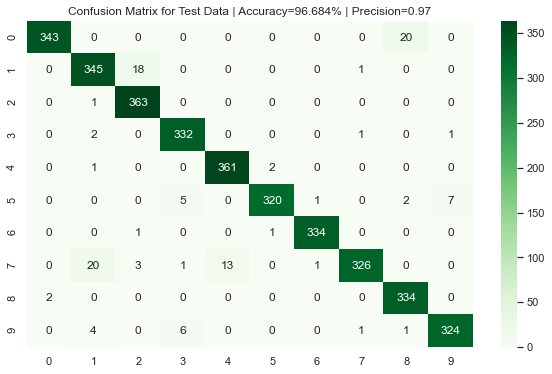

In [30]:

# Try and error on parameters
"""
param = {}
param['booster'] = 'gbtree'
param['objective'] = 'binary:logistic'
param["eval_metric"] = "error"
param['eta'] = 0.5
param['gamma'] = 0
param['max_depth'] = 10
param['min_child_weight']=3
param['max_delta_step'] = 0
param['subsample']= 2
param['colsample_bytree']=2
param['silent'] = 2
param['seed'] = 0
param['base_score'] = 0.6
"""
model = XGBClassifier(use_label_encoder=False)
model.fit(np.array(train_data[list(range(16))]), np.array(train_data["class"]))
y_pred = model.predict(test_data[list(range(16))])
predictions = [round(value) for value in y_pred]
# evaluate predictions
CalculateMetricsAndPlot(test_data["class"], predictions)